In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [4]:
california_housing = fetch_california_housing()

# Extract features (X) and target (y)
X, y = california_housing.data, california_housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Model 1: Linear Regression (MSE)
model_mse = LinearRegression()
model_mse.fit(X_train, y_train)
y_pred_mse = model_mse.predict(X_test)
mse_score = mean_squared_error(y_test, y_pred_mse)

In [7]:
# Model 2: Linear Regression (MAE)
model_mae = LinearRegression()
model_mae.fit(X_train, y_train)
y_pred_mae = model_mae.predict(X_test)
mae_score = mean_absolute_error(y_test, y_pred_mae)

In [8]:
# Model 3: Huber Regression (Huber Loss)
from sklearn.linear_model import HuberRegressor
model_huber = HuberRegressor()
model_huber.fit(X_train, y_train)
y_pred_huber = model_huber.predict(X_test)
huber_score = mean_absolute_error(y_test, y_pred_huber)

In [9]:
print(f'MSE: {mse_score}')
print(f'MAE: {mae_score}')
print(f'Huber Loss (MAE as proxy): {huber_score}')

MSE: 0.5558915986952442
MAE: 0.5332001304956566
Huber Loss (MAE as proxy): 0.5158456705614544


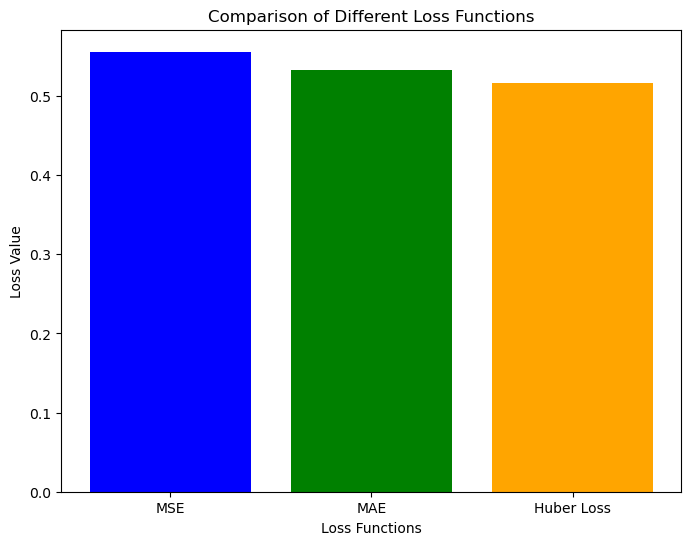

In [10]:
import matplotlib.pyplot as plt

# Loss values from the models
loss_names = ['MSE', 'MAE', 'Huber Loss']
loss_values = [0.5558915986952442, 0.5332001304956566, 0.5158456705614544]

# Plotting the loss values
plt.figure(figsize=(8, 6))
plt.bar(loss_names, loss_values, color=['blue', 'green', 'orange'])

# Adding labels and title
plt.xlabel('Loss Functions')
plt.ylabel('Loss Value')
plt.title('Comparison of Different Loss Functions')
plt.show()